In [1]:
# Vraag 3 - Data Science 2 examen

# ✅ Stap 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# ✅ Stap 2: Inlezen van het CSV-bestand met juiste decimale instellingen
df_all = pd.read_csv("inzamelingenALL.csv", sep=";", decimal=".")
df_all.columns = df_all.columns.str.strip()  # kolomnamen opschonen

df_all

,Gewicht (kg),Eural codes,Verwerkings codes,Maand,Jaar,Dag,Week,kostprijs
0,"5,5",200108,Composteren,2,2025,14,7,"1,1549999713897705"
1,"9,5",200108,Composteren,1,2025,31,5,"1,994999885559082"
2,"6,5",200108,Composteren,1,2025,17,3,"1,3650000095367432"
3,"6,5",200108,Composteren,1,2025,3,1,"1,3650000095367432"
4,"3,5",200108,Composteren,12,2024,20,51,"0,73499995470047"
...,...,...,...,...,...,...,...,...
158,0,150101,Recyclage,7,2021,16,28,"0,4"
159,0,150101,Recyclage,6,2021,18,24,"0,4"
160,0,150101,Recyclage,5,2021,21,20,"0,4"
161,0,150101,Recyclage,4,2021,23,16,"0,4"


In [3]:
# ✅ Stap 3: Converteer kolommen naar numeriek
df_all["Gewicht (kg)"] = pd.to_numeric(df_all["Gewicht (kg)"], errors="coerce")
df_all["kostprijs"] = pd.to_numeric(df_all["kostprijs"], errors="coerce")

In [4]:
# ✅ Stap 4: Filter enkel de jaren 2021 t.e.m. 2024
df_all = df_all[df_all["Jaar"].between(2021, 2024)]

In [10]:
# -------------------------------------------------------------------
# 3a) Histogram van gewichten (2p)
# -------------------------------------------------------------------

gewichten = df_all["Gewicht (kg)"]
print(df_all["Gewicht (kg)"].unique())



[nan  0.]


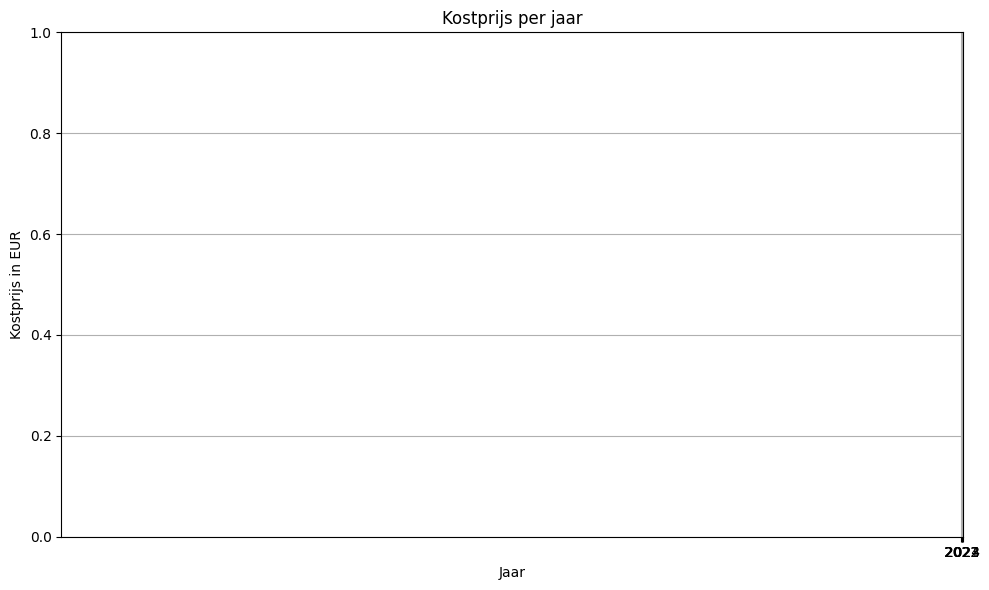

In [6]:
# -------------------------------------------------------------------
# 3b) Lijnplot kostprijs per jaar per fractie + totaal (6p)
# -------------------------------------------------------------------

# Verdeel op basis van verwerkingscodes
gft = df_all[df_all["Verwerkings codes"] == 135].copy()
rest = df_all[df_all["Verwerkings codes"] == 126].copy()
papier = df_all[df_all["Verwerkings codes"] == 237].copy()

# Voeg kolom 'Fractie' toe
gft["Fractie"] = "GFT"
rest["Fractie"] = "Restafval"
papier["Fractie"] = "Papier"

# Combineer in 1 df
df = pd.concat([gft, rest, papier])

# Groepeer per jaar en fractie
fractie_per_jaar = df.groupby(["Jaar", "Fractie"])["kostprijs"].sum().reset_index()

# Maak total-lijn
totaal_per_jaar = df.groupby("Jaar")["kostprijs"].sum().reset_index()
totaal_per_jaar["Fractie"] = "Total"

# Combineer alles
final = pd.concat([fractie_per_jaar, totaal_per_jaar])

# Plot de lijnen
plt.figure(figsize=(10, 6))
sns.lineplot(data=final, x="Jaar", y="kostprijs", hue="Fractie", style="Fractie", marker="o")

plt.title("Kostprijs per jaar")
plt.xlabel("Jaar")
plt.ylabel("Kostprijs in EUR")
plt.xticks([2021, 2022, 2023, 2024])
plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
print(df_all.columns)


Index(['Gewicht (kg)', 'Eural codes', 'Verwerkings codes', 'Maand', 'Jaar',
       'Dag', 'Week', 'kostprijs'],
      dtype='object')
